# Sales Prediction 

### Loading dataset

In [1]:
import pandas as pd

In [2]:
sales_df = pd.read_csv("./data/Advertising.csv")

In [3]:
sales_df.head(5)

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Drop the unnamed column

In [5]:
sales_df = sales_df.drop( "Unnamed: 0", axis = 1 )

In [6]:
sales_df.head(5)

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

### Data Exploration

In [8]:
import seaborn as sn

/Users/manaranjan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


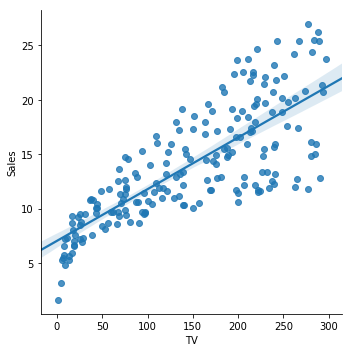

In [10]:
sn.lmplot( data = sales_df,
           x = 'TV',
           y = 'Sales' );

In [73]:
sales_df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

### Setting X and Y Variables

In [13]:
X = pd.DataFrame( sales_df.TV )
y = sales_df.Sales

### Split the dataset into train and test

In [19]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X,
                                                     y,
                                                     train_size = 0.8,
                                                     random_state = 100 )

/Users/manaranjan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
X_train.shape

(160, 1)

In [26]:
X_test.shape

(40, 1)

In [27]:
X_train[0:5]

TV
168  215.4
112  175.7
171  164.5
181  218.5
7    120.2

### Build a Model

using **y_train = f(X_train)**

### Linear Regression

The model assumes a linear relationship between the outcome and the factor

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lreg_v1 = LinearRegression()

In [33]:
lreg_v1.fit( X_train, y_train )
### OLS to find parameters

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
lreg_v1.intercept_

7.113008222196275

In [35]:
lreg_v1.coef_

array([0.04610976])

Sales = 7.113 + 0.0461 * (TV)

### Validate

In [36]:
y_pred = lreg_v1.predict( X_test )

In [37]:
y_df = pd.DataFrame( { "actual": y_test,
                       "predicted": y_pred,
                       "residual": y_test - y_pred } )

In [38]:
y_df[0:5]

actual  predicted  residual
126     6.6   7.472664 -0.872664
104    20.7  18.096352  2.603648
99     17.2  13.347047  3.852953
92     19.4  17.151102  2.248898
111    21.8  18.257736  3.542264

### Calculating Metrics

MSE = Mean Squared Error

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mse_v1 = mean_squared_error( y_df.actual,
                             y_df.predicted )

In [41]:
mse_v1

9.687069547890871

RMSE (Root Mean Squared Error)

In [42]:
import numpy as np

In [43]:
rmse_v1 = np.sqrt( mse_v1 )

In [44]:
rmse_v1

3.1124057492381794

In [45]:
import matplotlib.pyplot as plt

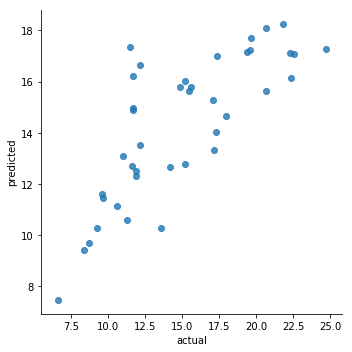

In [48]:
sn.lmplot( data = y_df,
           x = 'actual',
           y = 'predicted',
           fit_reg = False);

### R squared 

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score( y_df.actual,
          y_df.predicted )

0.5441581483697225

### Build a model with all parameter

In [51]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df.Sales

In [52]:
X[0:2]

TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1

In [53]:
y[0:2]

0    22.1
1    10.4
Name: Sales, dtype: float64

1. Split the dataset
2. Build the mode
3. Measure RMSE and R2

### Model 2

In [54]:
X_train, X_test, y_train, y_test = train_test_split( X,
                                                     y,
                                                     train_size = 0.8,
                                                     random_state = 100 )

/Users/manaranjan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
lreg_v2 = LinearRegression()

In [56]:
X_train[0:5]

TV  Radio  Newspaper
168  215.4   23.6       57.6
112  175.7   15.4        2.4
171  164.5   20.9       47.4
181  218.5    5.4       27.4
7    120.2   19.6       11.6

In [57]:
lreg_v2.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lreg_v2.intercept_

2.8172751352950005

In [59]:
lreg_v2.coef_

array([0.0455864 , 0.18569816, 0.00223281])

Sales = 2.81 + 0.0456 (TV) + 0.18 * (Radio) + 0.002 (NP)

In [60]:
y_pred = lreg_v2.predict( X_test )

In [61]:
np.sqrt( mean_squared_error( y_test, y_pred ) )

1.3165457764851067

In [62]:
r2_score( y_test, y_pred )

0.9184369032278497

Sales = 2.81 + 0.0456 (TV) + 0.18 * (Radio) + 0.002 (NP) + Error 

Error = 8%

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
   - Interaction effect : Synergy Effect ( 1 + 1 = 3 )
     - Multiplication or ratios     
5. Noise (randomness)
   

### Adding a new features

In [67]:
X_train['TV_radio'] = X_train['TV'] * X_train['Radio']
X_test['TV_radio'] = X_test['TV'] * X_test['Radio']

/Users/manaranjan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/manaranjan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Building  a Model V3 with four parameters

Sales = f( TV, Radio, NP, TV_radio )

1. Build the model
2. Measure RMSE and R2

In [68]:
lreg_v3 = LinearRegression()

In [69]:
lreg_v3.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
y_pred = lreg_v3.predict( X_test )

In [71]:
r2_score( y_pred, y_test )

0.9804732905847567

In [72]:
np.sqrt( mean_squared_error(y_pred, y_test) )

0.6527790322684008

### K-Fold Cross Validation Strategy

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
scores = cross_val_score( LinearRegression(),
                          X_train,
                          y_train,
                          cv = 5,
                          scoring = 'r2' )

In [78]:
scores

array([0.96612485, 0.97087485, 0.96926517, 0.97593387, 0.93389054])

In [79]:
scores.std()

0.01500292431852364

In [80]:
scores.mean()

0.9632178551479843

### Model Deployement

Serialization of models

In [81]:
from sklearn.externals import joblib

In [82]:
joblib.dump( lreg_v3, "sales.pkl" )

['sales.pkl']